In [1]:
import numpy as np
import pandas as pd
import json

import warnings
warnings.filterwarnings("ignore")

from epilepsypcm.utils.outcome_params import node_location
from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

all_positive_patients = pd.read_csv("df_final.csv", sep = ',').reset_index(drop = True)

In [2]:
print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

0.0    259
1.0     56
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,IZ,EP,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,...,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,patient,InDegree,OutDegree,EV,Closeness
0,0,LA1_LA2,1.0,0.0,0.0,0.000000,0.064516,0.000000,0.000000,0.000000,...,2.011706,3.724259,3.460362,2.796966,3.000218,PY21N008,0.000000,0.071429,4.993936e-14,0.000000
1,1,LA9_LA10,0.0,1.0,0.0,0.000000,0.193548,1.808045,1.676081,2.493333,...,9.957544,5.060794,6.246739,4.478926,6.889325,PY21N008,0.000000,0.214286,4.993936e-14,0.000000
2,2,LAH1_LAH2,1.0,1.0,0.0,0.064516,0.193548,7.116911,19.154270,4.252294,...,14.745868,3.809967,3.367630,1.821021,1.867067,PY21N008,0.071429,0.214286,7.960633e-04,0.174603
3,3,LAH8_LAH9,0.0,0.0,0.0,0.290323,0.096774,4.306443,3.856300,4.059026,...,2.173960,1.695722,1.598789,1.574253,2.044144,PY21N008,0.321429,0.107143,1.590588e-01,0.480159
4,4,LPH1_LPH2,0.0,1.0,0.0,0.096774,0.258065,5.792531,15.863221,3.143365,...,7.764073,3.585250,3.693649,3.242192,3.639533,PY21N008,0.107143,0.285714,4.743272e-03,0.218807


# Feature Comparison: Nodal vs Network vs All

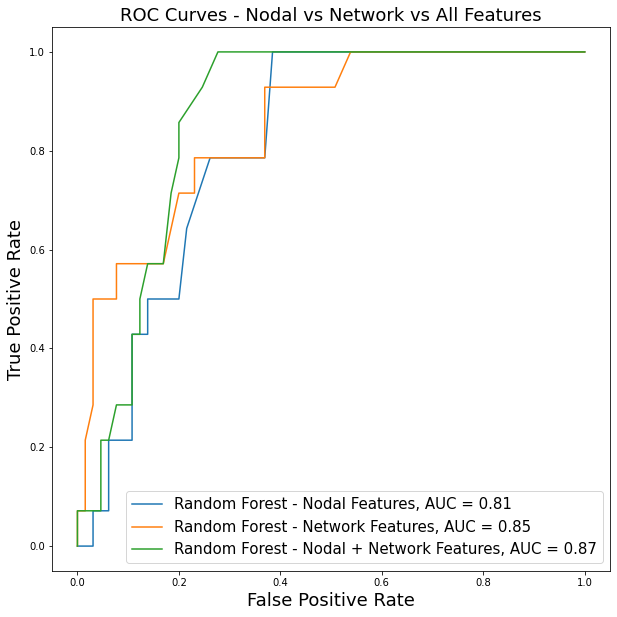

In [6]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves - Nodal vs Network vs All Features", fontsize = 18)
plt.xlabel("False Positive Rate", fontsize = 18)
plt.ylabel("True Positive Rate", fontsize = 18)

X_list = ["Channels", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

smote = False
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest - Nodal Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

X_list = ["Channels","InDegree", "OutDegree", "Closeness"]
smote = False
max_depth =20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest - Network Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV",
         "InDegree", "OutDegree", "EV", "Closeness"]
smote = False
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest - Nodal + Network Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right',  prop={'size': 15})

plt.savefig("Nodal_Network_All_ROC.pdf")
 

## Adding in Upsampling Methods to Comparison

0.0    259
1.0     56
Name: outcome, dtype: int64


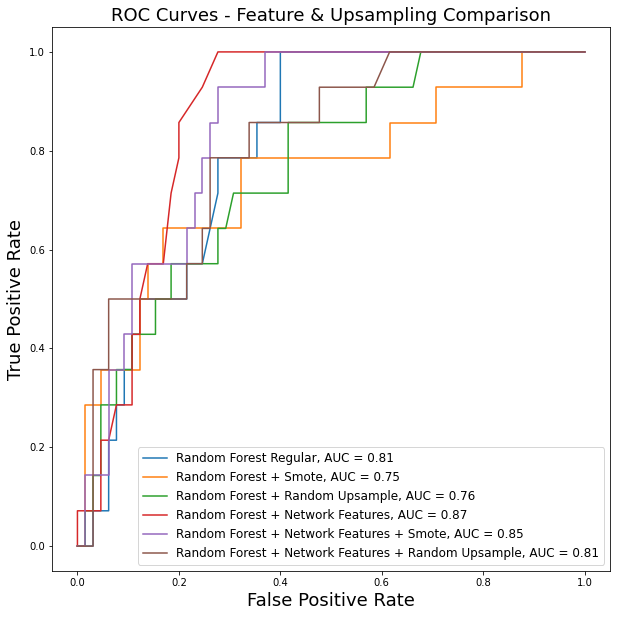

In [4]:
X_list = ["Channels", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves - Feature & Upsampling Comparison", fontsize = 18)
plt.xlabel("False Positive Rate", fontsize = 18)
plt.ylabel("True Positive Rate", fontsize = 18)

# REGULAR FEATURES

#random forest regular
smote = False
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest Regular, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest SMOTE
smote = True
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


#random forest random upsample
smote = "resample"
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')


# REGULAR FEATURES + NETWORK FEATURES

print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV",
         "InDegree", "OutDegree", "EV", "Closeness"]

#random forest with network features
smote = False
max_depth = 20
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest with network features SMOTE
smote = True
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Smote, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest with network features random upsample
smote = "resample"
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(fpr, tpr, label = "Random Forest + Network Features + Random Upsample, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right',  prop={'size': 12})


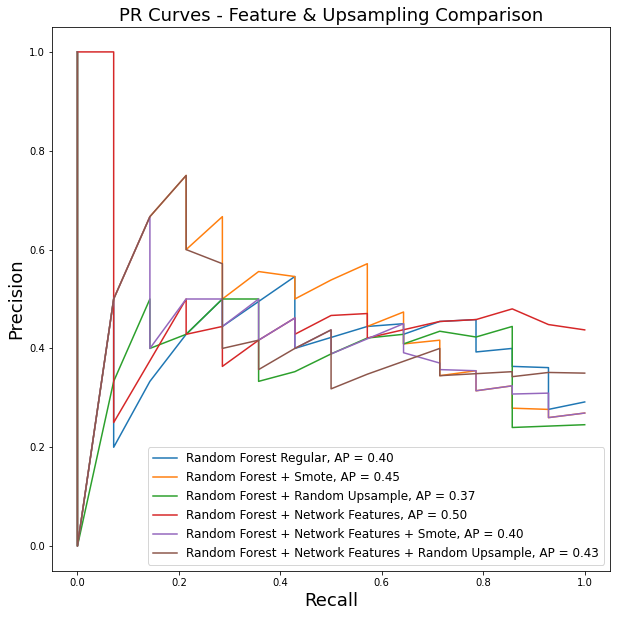

In [5]:
#all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves - Feature & Upsampling Comparison", fontsize = 18)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

# REGULAR FEATURES

#random forest regular
smote = False
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest Regular, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + smote
smote = True
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + random upsample
smote = "resample"
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')


# REGULAR FEATURES + NETWORK FEATURES

X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV",
         "InDegree", "OutDegree", "EV", "Closeness"]

#random forest + network features
smote = False
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + smote
smote = True
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Smote, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest + network features + random upsample
smote = "resample"
max_depth = 20
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr, smote)
plt.plot(recall, precision, label='Random Forest + Network Features + Random Upsample, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right', prop={'size': 12})